In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
import seaborn as sns
import os
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [4]:
fuel = pd.read_csv('fuel_consumption.csv', index_col=False)

In [5]:
fuel.head()

,model_year,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,fuel_consumption_comb_mpg,co2_emissions
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
fuel.tail()

,model_year,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,fuel_consumption_comb_mpg,co2_emissions
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260
1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6,AS6,X,14.9,10.2,12.8,22,294


In [7]:
fuel.shape

(1067, 13)

In [8]:
fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   model_year                 1067 non-null   int64  
 1   make                       1067 non-null   object 
 2   model                      1067 non-null   object 
 3   vehicle_class              1067 non-null   object 
 4   engine_size                1067 non-null   float64
 5   cylinders                  1067 non-null   int64  
 6   transmission               1067 non-null   object 
 7   fuel_type                  1067 non-null   object 
 8   fuel_consumption_city      1067 non-null   float64
 9   fuel_consumption_hwy       1067 non-null   float64
 10  fuel_consumption_comb      1067 non-null   float64
 11  fuel_consumption_comb_mpg  1067 non-null   int64  
 12  co2_emissions              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage:

In [9]:
# List the columns in fuel
fuel.columns

Index(['model_year', 'make', 'model', 'vehicle_class', 'engine_size',
       'cylinders', 'transmission', 'fuel_type', 'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_comb',
       'fuel_consumption_comb_mpg', 'co2_emissions'],
      dtype='object')

In [10]:
# Check for missing values in the entire DataFrame
missing_values_total = fuel.isna().sum()
print("Missing Values Total:")
print(missing_values_total)

Missing Values Total:
model_year                   0
make                         0
model                        0
vehicle_class                0
engine_size                  0
cylinders                    0
transmission                 0
fuel_type                    0
fuel_consumption_city        0
fuel_consumption_hwy         0
fuel_consumption_comb        0
fuel_consumption_comb_mpg    0
co2_emissions                0
dtype: int64


Observation: Dataframe has no missing values.

In [11]:
fuel

,model_year,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,fuel_consumption_comb_mpg,co2_emissions
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [12]:
# Get the unique number car makes
num_make = fuel['make'].nunique()
print(num_make)

39


In [13]:
num_make = fuel['model'].nunique()
print(num_make)

663


In [14]:
num_make = fuel['model_year'].nunique()
print(num_make)

1


In [15]:
num_make = fuel['vehicle_class'].nunique()
print(num_make)

16


In [16]:
#continous datatype
cdf = fuel[['engine_size','cylinders', 'fuel_consumption_city', 'fuel_consumption_hwy', 'fuel_consumption_comb', 'co2_emissions']]
cdf.head(9)

,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,co2_emissions
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


**## Descriptive Statistics**

In [17]:
descriptive_stats = cdf.describe()
descriptive_stats

,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,co2_emissions
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,13.296532,9.474602,11.580881,256.228679
std,1.415895,1.797447,4.101253,2.794510,3.485595,63.372304
min,1.000000,3.000000,4.600000,4.900000,4.700000,108.000000
25%,2.000000,4.000000,10.250000,7.500000,9.000000,207.000000
50%,3.400000,6.000000,12.600000,8.800000,10.900000,251.000000
75%,4.300000,8.000000,15.550000,10.850000,13.350000,294.000000
max,8.400000,12.000000,30.200000,20.500000,25.800000,488.000000


In [18]:
fuel.describe(include=object)

,make,model,vehicle_class,transmission,fuel_type
count,1067,1067,1067,1067,1067
unique,39,663,16,22,4
top,FORD,F150 FFV,MID-SIZE,A6,X
freq,90,8,178,222,514


In [19]:
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

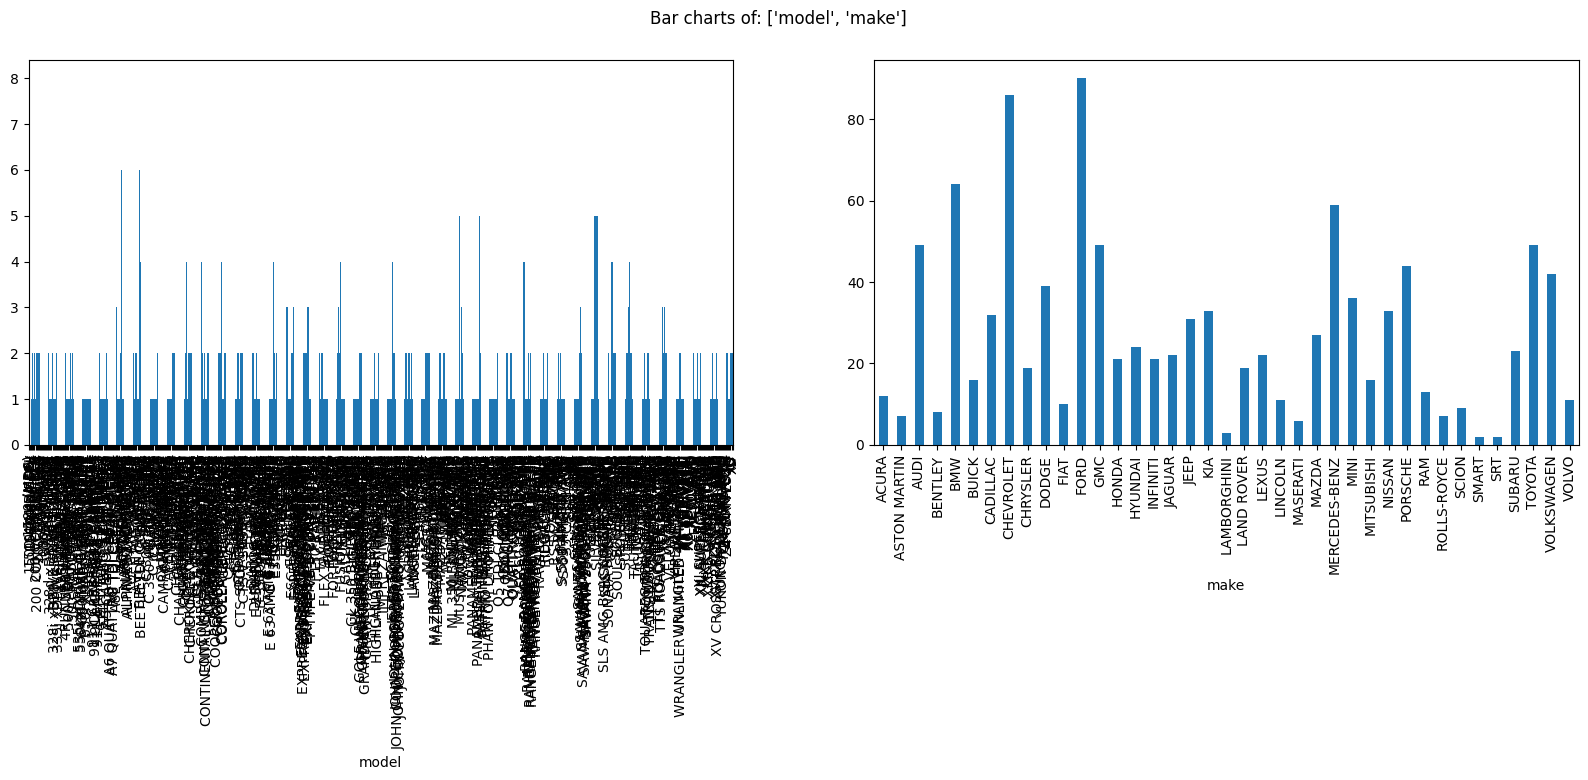

In [21]:
PlotBarCharts(inpData=fuel, colsToPlot=['model', 'make'])

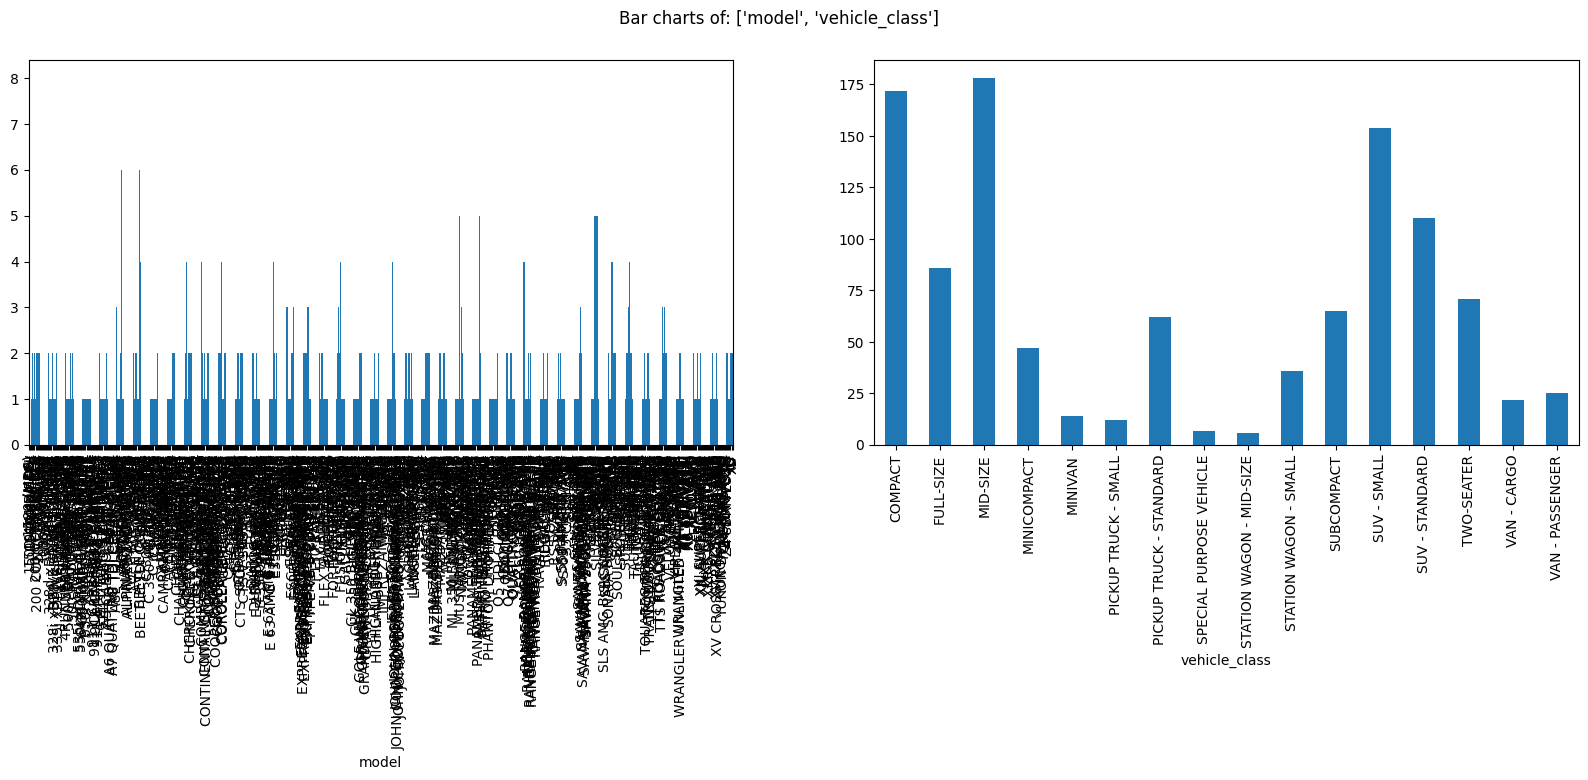

In [22]:
PlotBarCharts(inpData=fuel, colsToPlot=['model', 'vehicle_class'])

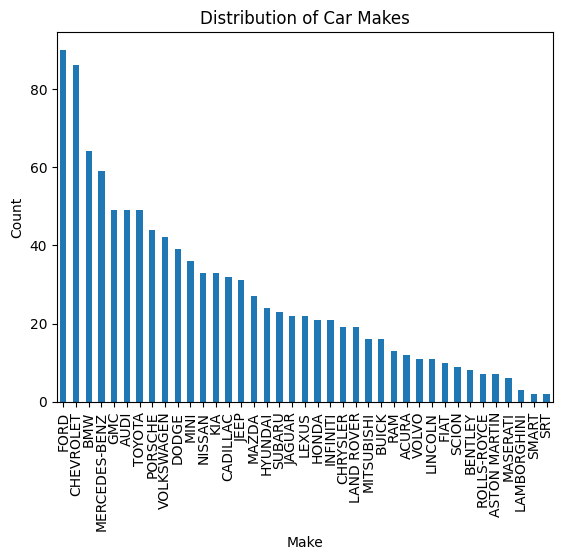

In [26]:
# Count the occurrences of each make
make_counts = fuel['make'].value_counts()

# Plot a bar chart of the makes
figsize=(50,20)
make_counts.plot.bar()
plt.xlabel('Make')
plt.ylabel('Count')
plt.title('Distribution of Car Makes')
plt.xticks(rotation=90)
plt.show()

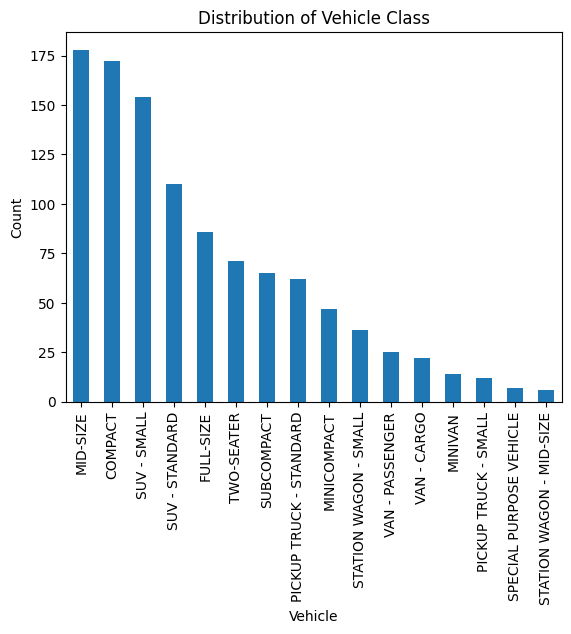

In [25]:
vehicle_counts = fuel['vehicle_class'].value_counts()

vehicle_counts.plot.bar()
plt.xlabel('Vehicle')
plt.ylabel('Count')
plt.title('Distribution of Vehicle Class')
plt.xticks(rotation=90)
plt.show()

### Exploration on the continuous data

In [30]:
### continous data
continous_data = fuel.select_dtypes(exclude='object') 

cd = fuel.select_dtypes(include= ['int64','float64'])


In [31]:
continous_data

,model_year,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,fuel_consumption_comb_mpg,co2_emissions
0,2014,2.0,4,9.9,6.7,8.5,33,196
1,2014,2.4,4,11.2,7.7,9.6,29,221
2,2014,1.5,4,6.0,5.8,5.9,48,136
3,2014,3.5,6,12.7,9.1,11.1,25,255
4,2014,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...
1062,2014,3.0,6,13.4,9.8,11.8,24,271
1063,2014,3.2,6,13.2,9.5,11.5,25,264
1064,2014,3.0,6,13.4,9.8,11.8,24,271
1065,2014,3.2,6,12.9,9.3,11.3,25,260


In [32]:
continous_data.columns

Index(['model_year', 'engine_size', 'cylinders', 'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_comb',
       'fuel_consumption_comb_mpg', 'co2_emissions'],
      dtype='object')

In [34]:
continous_columns = continous_data.columns

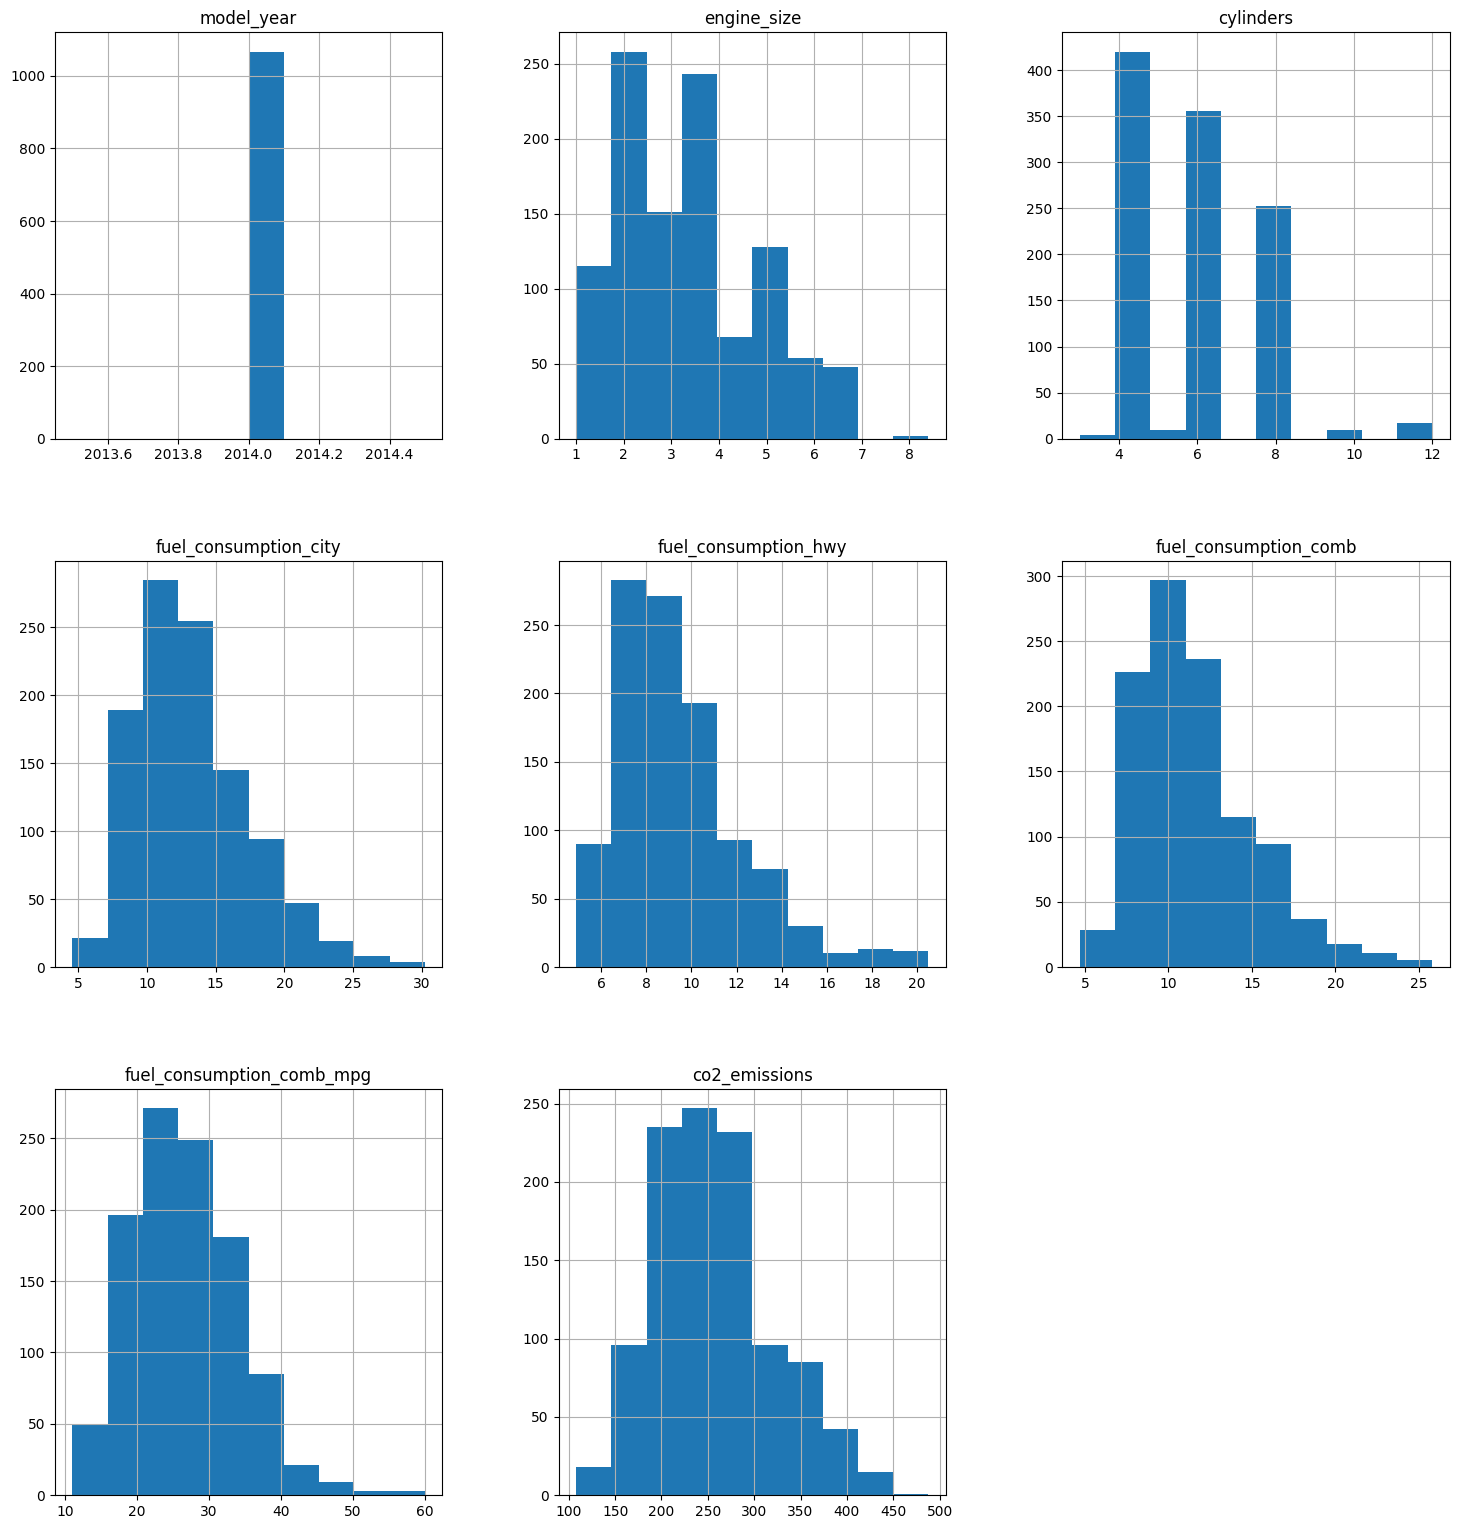

In [36]:
fuel.hist(continous_columns, figsize=(18,19))
plt.show()

Alternatively

In [28]:
numeric_columns = ['engine_size','cylinders', 'fuel_consumption_city', 'fuel_consumption_hwy', 'fuel_consumption_comb', 'co2_emissions']

### Histograms for the continuous data

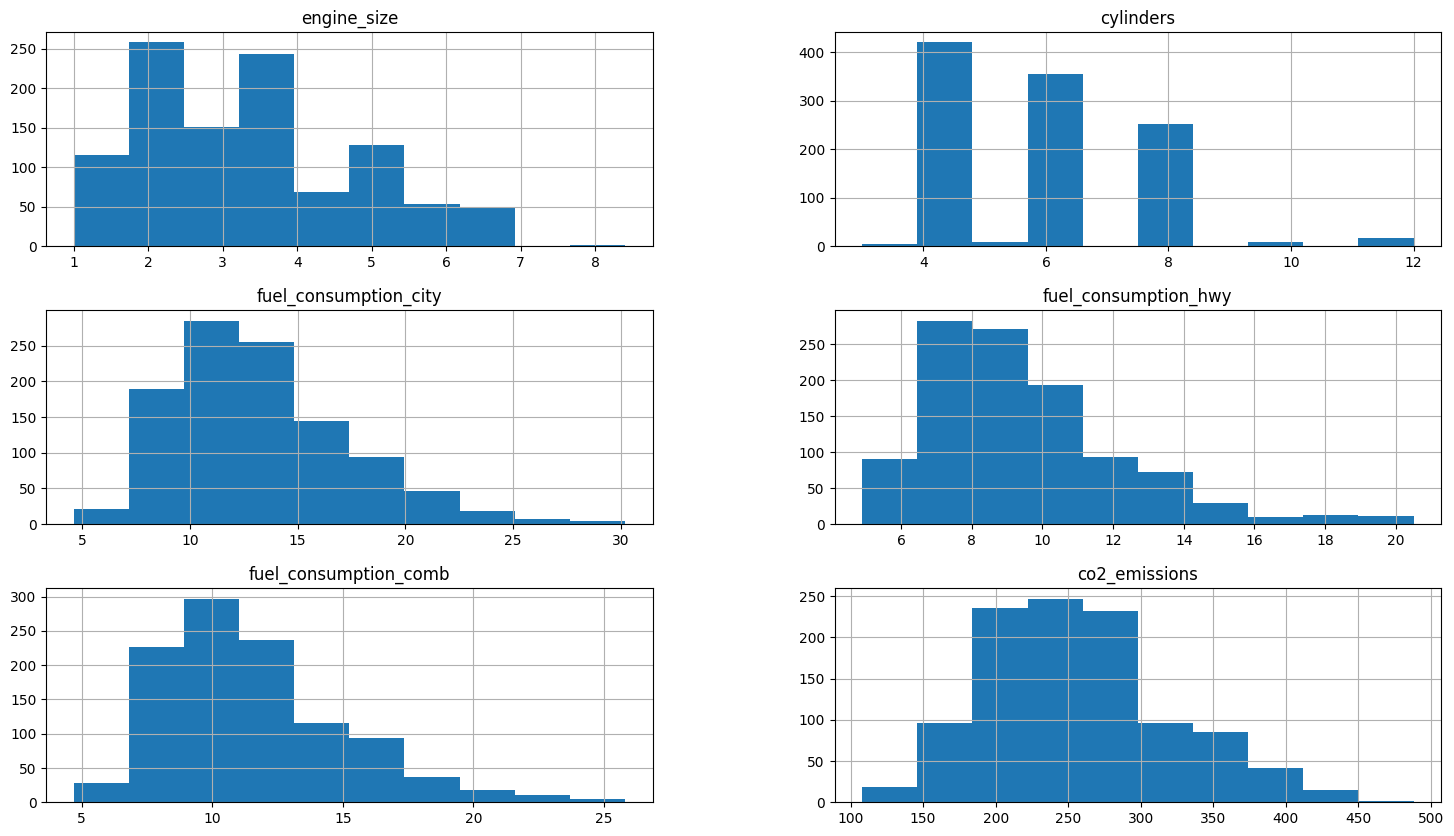

In [29]:
fuel.hist(numeric_columns, figsize=(18,10))
plt.show()

None is normally distributed.

Only cylinders have no outliers.

In [37]:
fuel

,model_year,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,fuel_consumption_comb_mpg,co2_emissions
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


# Vehicle Class and Make Analysis

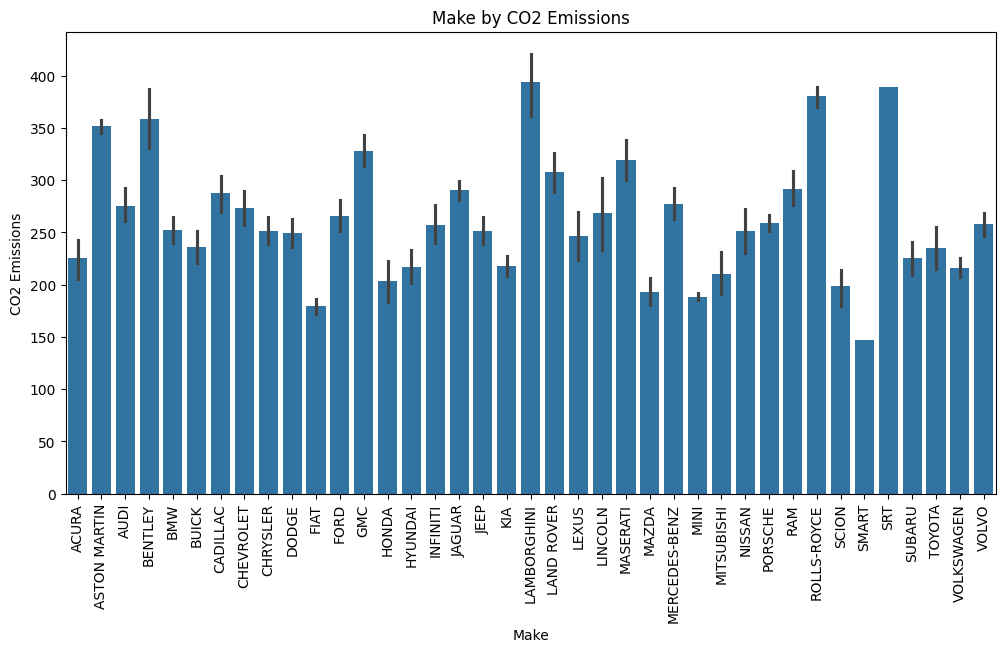

In [38]:
# Geographical Analysis: Plotting a bar chart of emissions by make
plt.figure(figsize=(12, 6))
sns.barplot(data=fuel, x='make', y='co2_emissions')
plt.xticks(rotation=90)
plt.xlabel('Make')
plt.ylabel('CO2 Emissions')
plt.title('Make by CO2 Emissions')
plt.show()

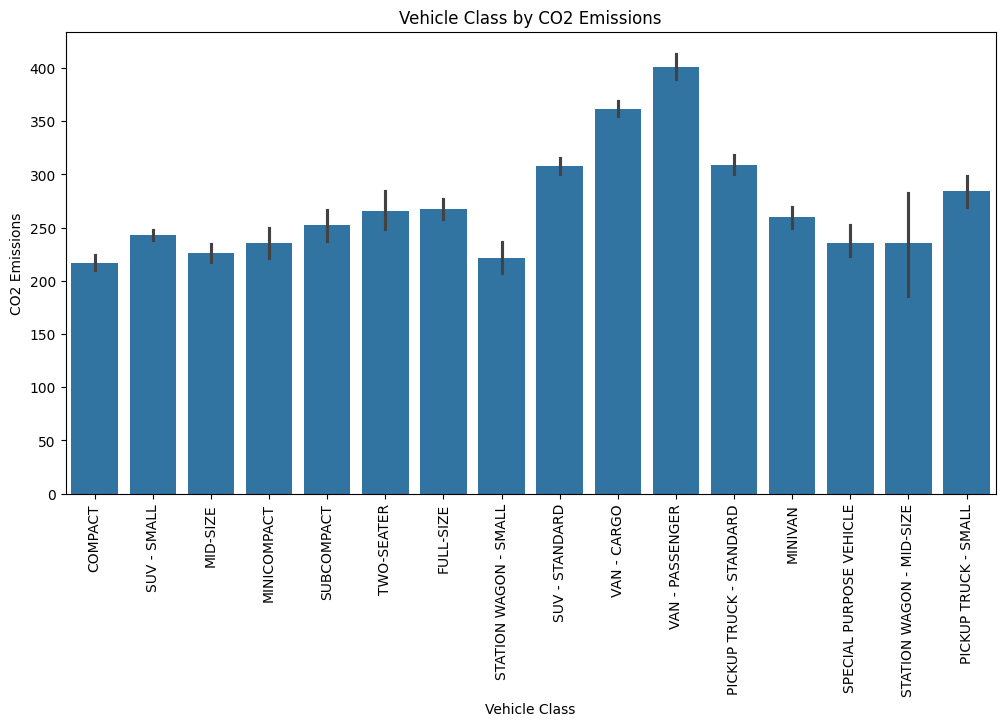

In [39]:
# Geographical Analysis: Plotting a bar chart of emissions by vehicle class
plt.figure(figsize=(12, 6))
sns.barplot(data=fuel, x='vehicle_class', y='co2_emissions')
plt.xticks(rotation=90)
plt.xlabel('Vehicle Class')
plt.ylabel('CO2 Emissions')
plt.title('Vehicle Class by CO2 Emissions')
plt.show()

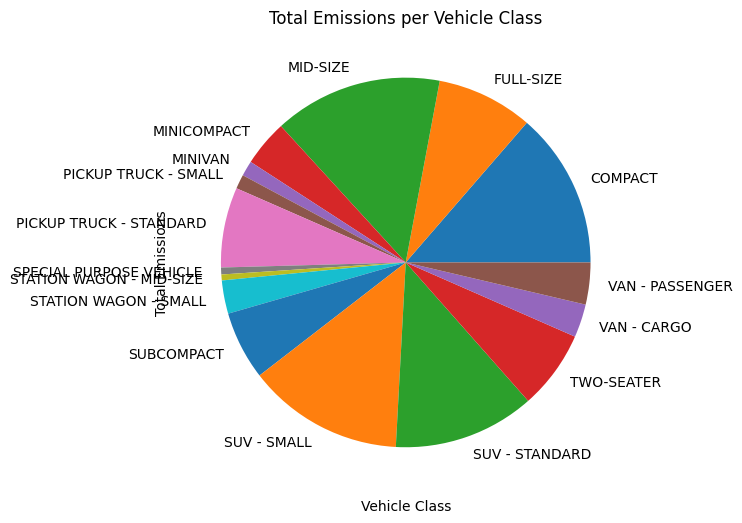

In [41]:
# Calculate total emisisons by vehicle class
total_emissions_per_class = fuel.groupby('vehicle_class')['co2_emissions'].sum()


plt.figure(figsize=(10, 6))
total_emissions_per_class.plot(kind='pie')
plt.xlabel('Vehicle Class')
plt.ylabel('Total Emissions')
plt.title('Total Emissions per Vehicle Class')
plt.xticks(rotation=90)
plt.show()

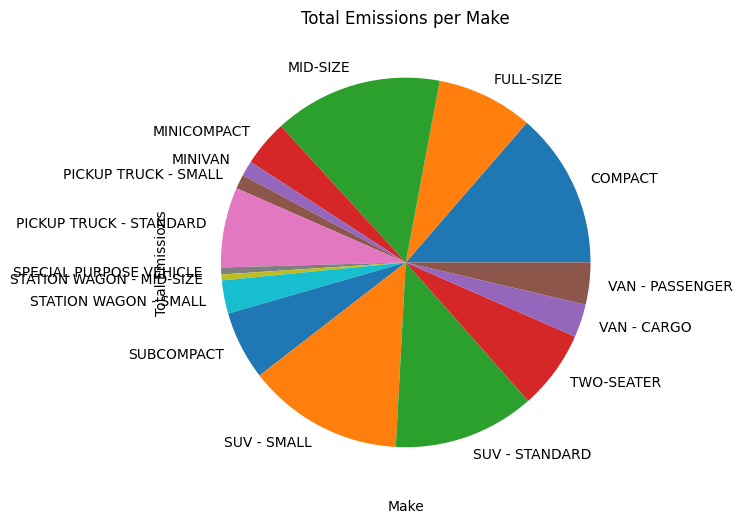

In [42]:
# Calculate total emisisons by make
total_emissions_per_make = fuel.groupby('make')['co2_emissions'].sum()


plt.figure(figsize=(10, 6))
total_emissions_per_class.plot(kind='pie')
plt.xlabel('Make')
plt.ylabel('Total Emissions')
plt.title('Total Emissions per Make')
plt.xticks(rotation=45)
plt.show()

#Pie chart is not an efficient communication option

# Checking for Outliers

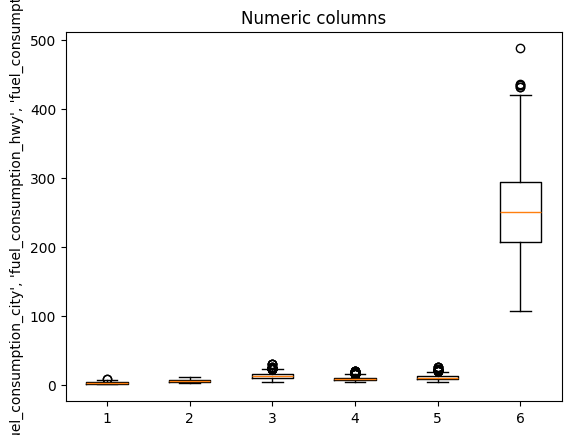

In [43]:
#Use data visualization techniques to inspect the data’s distribution and verify the presence of outliers
#Use either the library seaborn or matplotlib
# Create a box plot for the specified column
plt.boxplot(fuel[numeric_columns])
plt.ylabel(numeric_columns)
plt.title('Numeric columns')
plt.show()

Plot them individually.

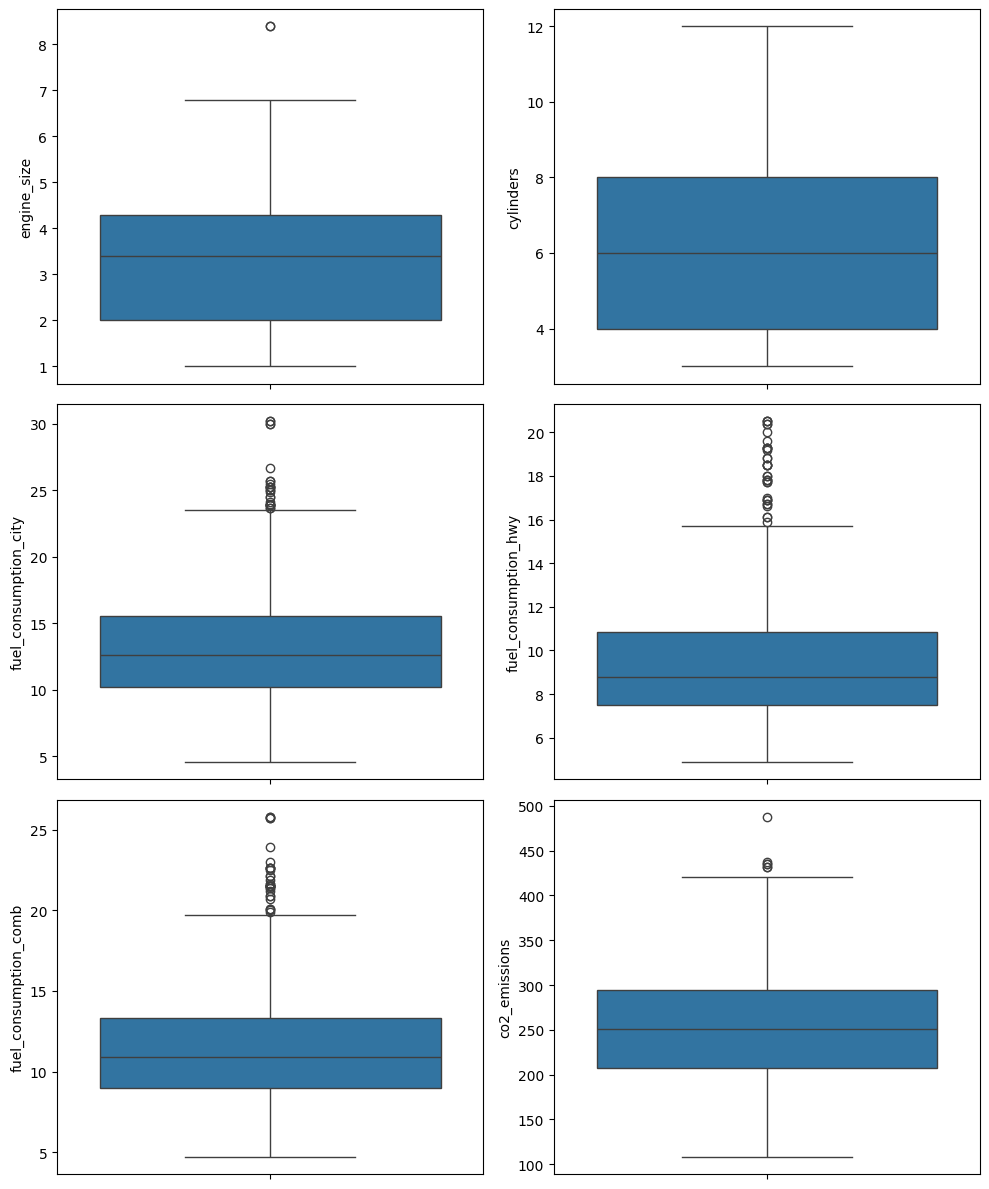

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))

# Define the column names for the boxplots
columns = ["engine_size", "cylinders", "fuel_consumption_city", "fuel_consumption_hwy", "fuel_consumption_comb", "co2_emissions"]

# Plot boxplots on subplots using a for loop
for i, col in enumerate(columns):
    row, col_num = divmod(i, 2)
    sns.boxplot(y=col, data=fuel, ax=axes[row, col_num])

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


Alternatively

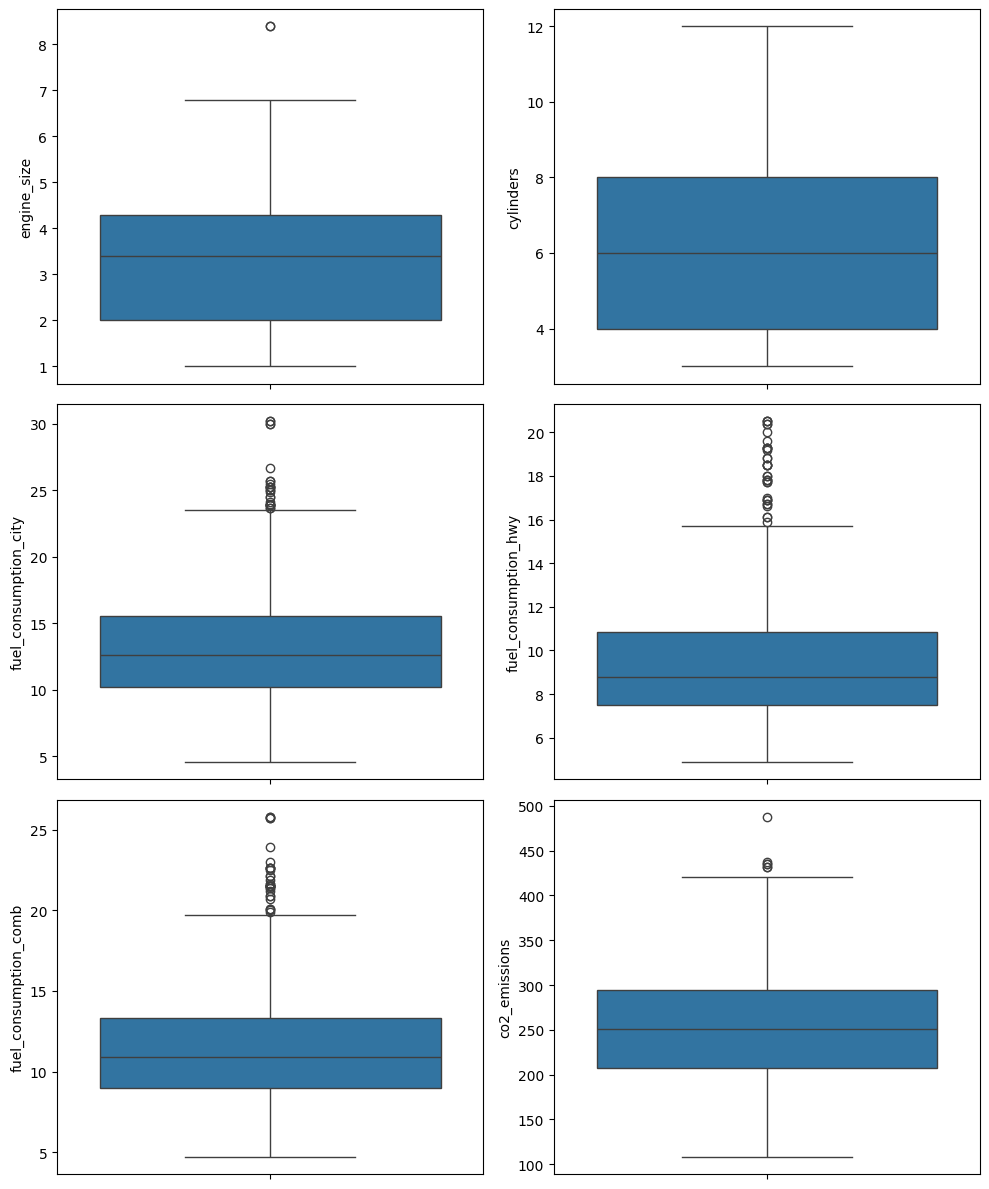

In [44]:
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))

# Plot boxplots on subplots
sns.boxplot(y="engine_size", data=fuel, ax=axes[0, 0])
sns.boxplot(y="cylinders", data=fuel, ax=axes[0, 1])
sns.boxplot(y="fuel_consumption_city", data=fuel, ax=axes[1, 0])
sns.boxplot(y="fuel_consumption_hwy", data=fuel, ax=axes[1, 1])
sns.boxplot(y="fuel_consumption_comb", data=fuel, ax=axes[2, 0])
sns.boxplot(y="co2_emissions", data=fuel, ax=axes[2, 1])

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [46]:
# Select the columns of interest
columns_to_clean = ['engine_size', 'cylinders','fuel_consumption_city', 'fuel_consumption_hwy', 'fuel_consumption_comb', 'co2_emissions']

In [48]:
# Define your threshold for the z-score or IQR
z_score_threshold = 3
iqr_threshold = 1.5

# Initialize a dictionary to store the outliers mask for each column
outliers_mask = {}

# Iterate over each column to identify outliers
for column in columns_to_clean:
    # Calculate the z-scores or IQR for the column
    z_scores = np.abs((fuel[column] - fuel[column].mean()) / fuel[column].std())
    q25 = fuel[column].quantile(0.25)
    q75 = fuel[column].quantile(0.75)
    iqr = q75 - q25

    # Update the outliers mask for the column
    outliers_mask[column] = (z_scores >= z_score_threshold) if z_scores is not None else np.zeros_like(fuel[column], dtype=bool)
    outliers_mask[column] |= (fuel[column] < q25 - iqr_threshold * iqr) | (fuel[column] > q75 + iqr_threshold * iqr)

# Combine the outliers mask for all columns using logical OR
combined_mask = np.logical_or.reduce(list(outliers_mask.values()))

# Remove outliers based on the combined mask
fuel_clean = fuel[~combined_mask]


In [49]:
fuel_clean

,model_year,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,fuel_consumption_comb_mpg,co2_emissions
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


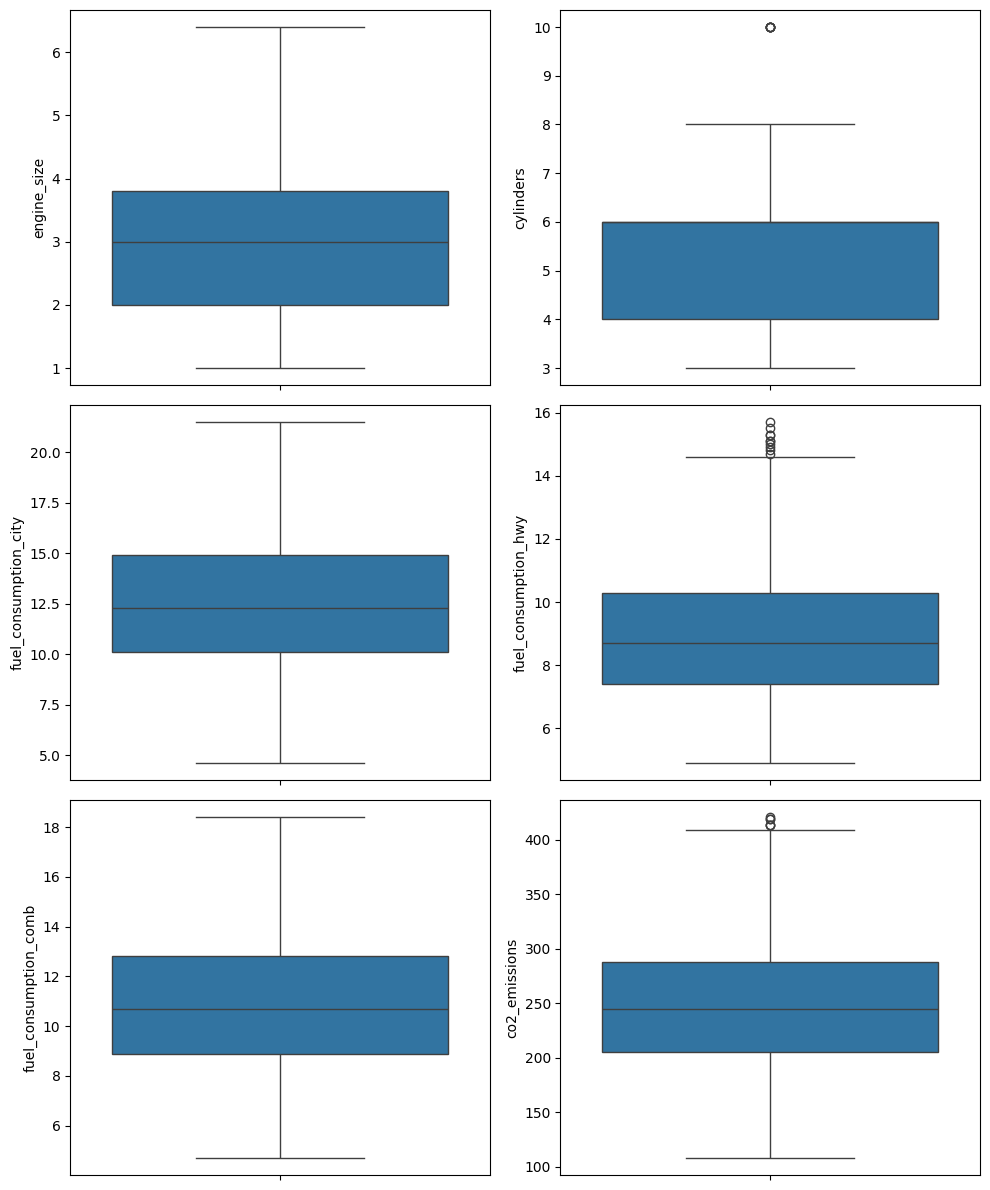

In [51]:
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))

# Plot boxplots on subplots
sns.boxplot(y="engine_size", data=fuel_clean, ax=axes[0, 0])
sns.boxplot(y="cylinders", data=fuel_clean, ax=axes[0, 1])
sns.boxplot(y="fuel_consumption_city", data=fuel_clean, ax=axes[1, 0])
sns.boxplot(y="fuel_consumption_hwy", data=fuel_clean, ax=axes[1, 1])
sns.boxplot(y="fuel_consumption_comb", data=fuel_clean, ax=axes[2, 0])
sns.boxplot(y="co2_emissions", data=fuel_clean, ax=axes[2, 1])

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
#'engine_size','cylinders', 'fuel_consumption_city', 'fuel_consumption_hwy', 'fuel_consumption_comb', 'co2_emissions'

In [52]:
fuel_clean

,model_year,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,fuel_consumption_comb_mpg,co2_emissions
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


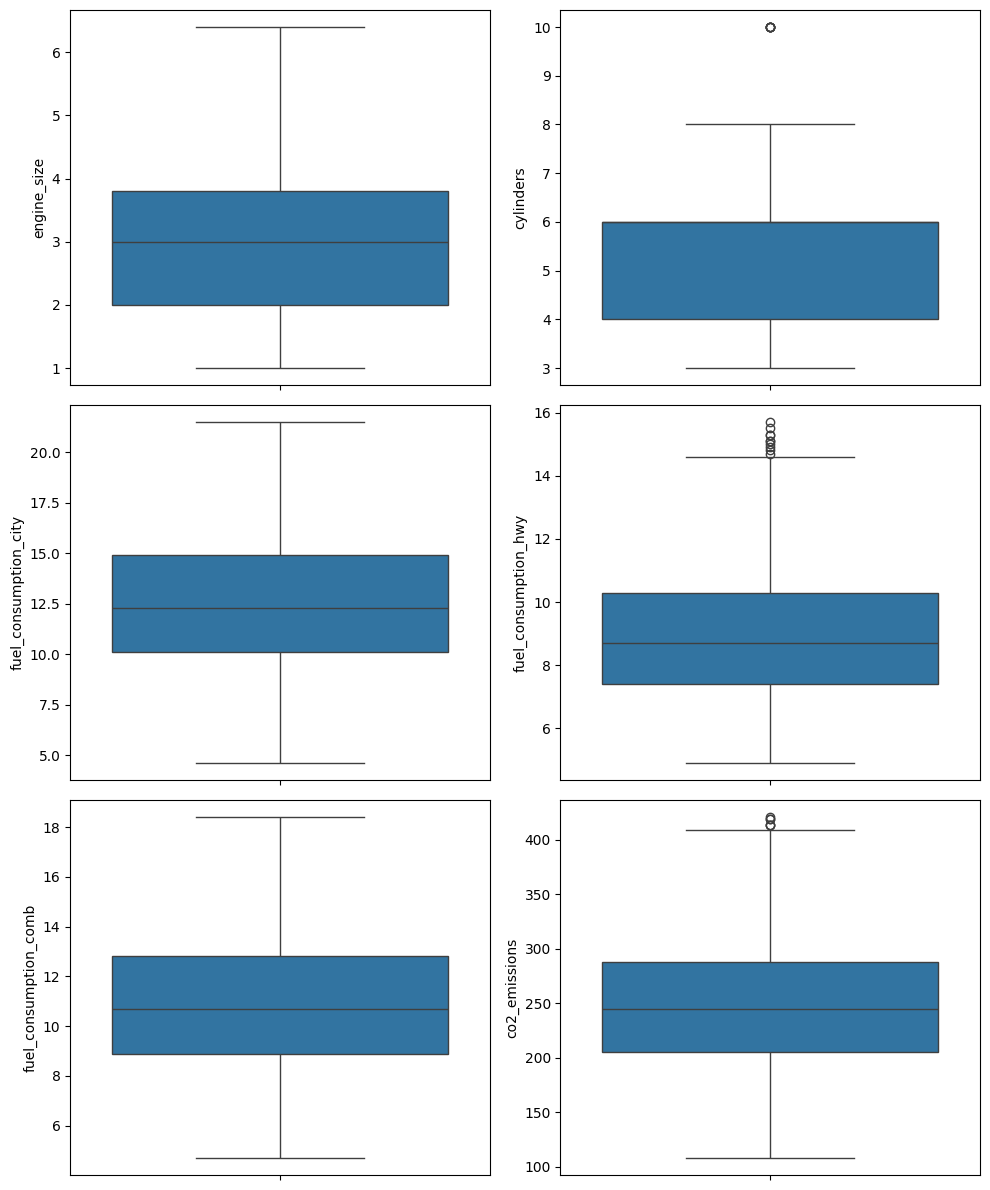

In [53]:
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))

# Plot boxplots on subplots
sns.boxplot(y="engine_size", data=fuel_clean, ax=axes[0, 0])
sns.boxplot(y="cylinders", data=fuel_clean, ax=axes[0, 1])
sns.boxplot(y="fuel_consumption_city", data=fuel_clean, ax=axes[1, 0])
sns.boxplot(y="fuel_consumption_hwy", data=fuel_clean, ax=axes[1, 1])
sns.boxplot(y="fuel_consumption_comb", data=fuel_clean, ax=axes[2, 0])
sns.boxplot(y="co2_emissions", data=fuel_clean, ax=axes[2, 1])

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

### Separating the categorical variables

In [54]:
fuel_cat = fuel.select_dtypes(include='object').copy()
# Create a new DataFrame with non-object columns
fuel_num = fuel.select_dtypes(exclude='object').copy()

In [55]:
fuel_cat

,make,model,vehicle_class,transmission,fuel_type
0,ACURA,ILX,COMPACT,AS5,Z
1,ACURA,ILX,COMPACT,M6,Z
2,ACURA,ILX HYBRID,COMPACT,AV7,Z
3,ACURA,MDX 4WD,SUV - SMALL,AS6,Z
4,ACURA,RDX AWD,SUV - SMALL,AS6,Z
...,...,...,...,...,...
1062,VOLVO,XC60 AWD,SUV - SMALL,AS6,X
1063,VOLVO,XC60 AWD,SUV - SMALL,AS6,X
1064,VOLVO,XC70 AWD,SUV - SMALL,AS6,X
1065,VOLVO,XC70 AWD,SUV - SMALL,AS6,X


In [56]:
fuel_num

,model_year,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,fuel_consumption_comb_mpg,co2_emissions
0,2014,2.0,4,9.9,6.7,8.5,33,196
1,2014,2.4,4,11.2,7.7,9.6,29,221
2,2014,1.5,4,6.0,5.8,5.9,48,136
3,2014,3.5,6,12.7,9.1,11.1,25,255
4,2014,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...
1062,2014,3.0,6,13.4,9.8,11.8,24,271
1063,2014,3.2,6,13.2,9.5,11.5,25,264
1064,2014,3.0,6,13.4,9.8,11.8,24,271
1065,2014,3.2,6,12.9,9.3,11.3,25,260


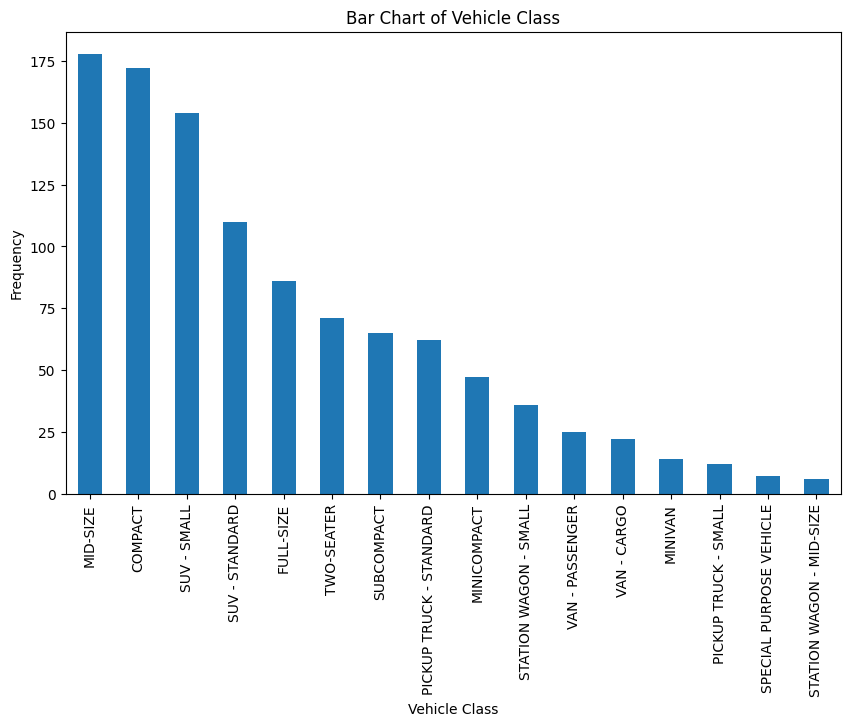

In [57]:
# Count the frequency of each category
category_counts = fuel_cat['vehicle_class'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.xlabel('Vehicle Class')
plt.ylabel('Frequency')
plt.title('Bar Chart of Vehicle Class')
plt.show()


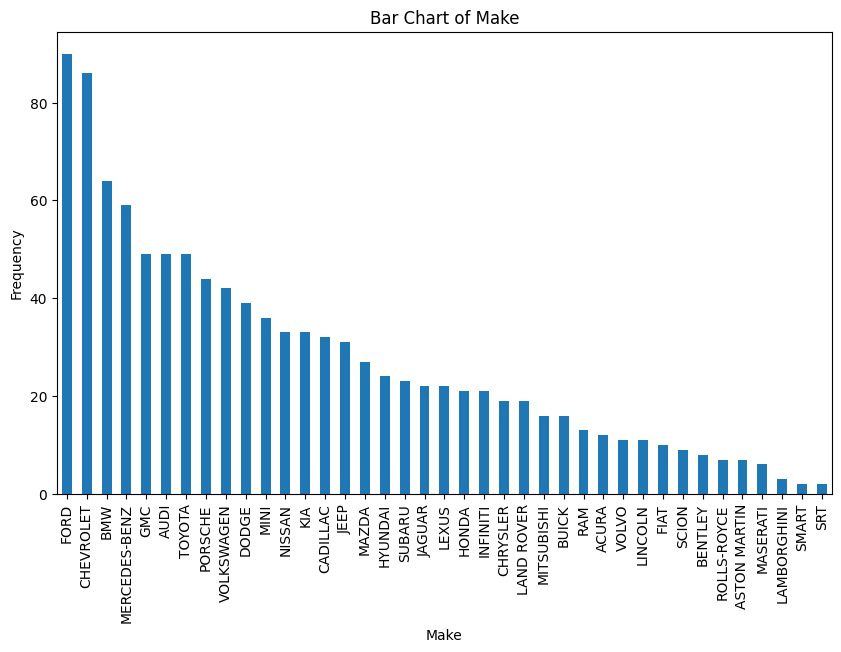

In [58]:
# Count the frequency of each category
category_counts = fuel_cat['make'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.xlabel('Make')
plt.ylabel('Frequency')
plt.title('Bar Chart of Make')
plt.show()

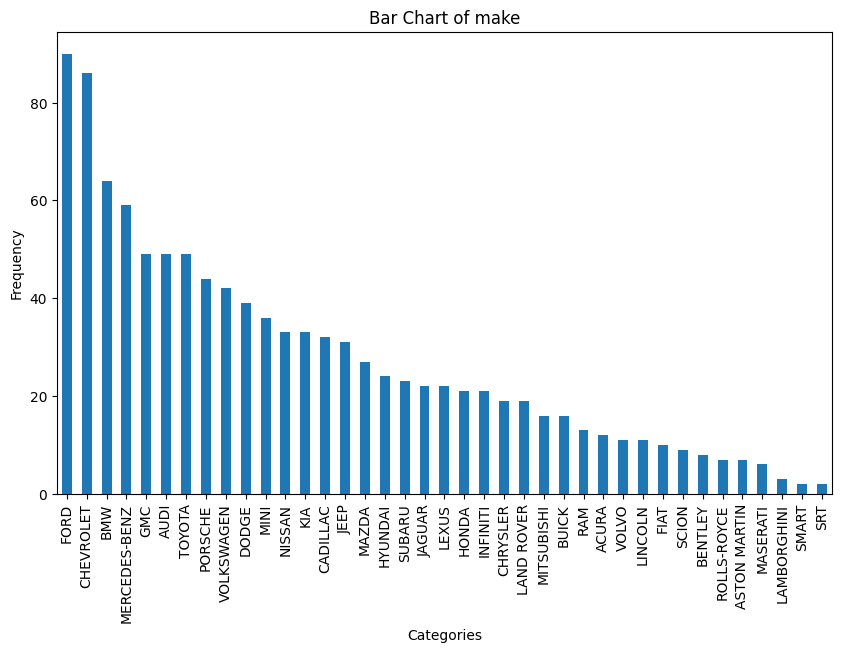

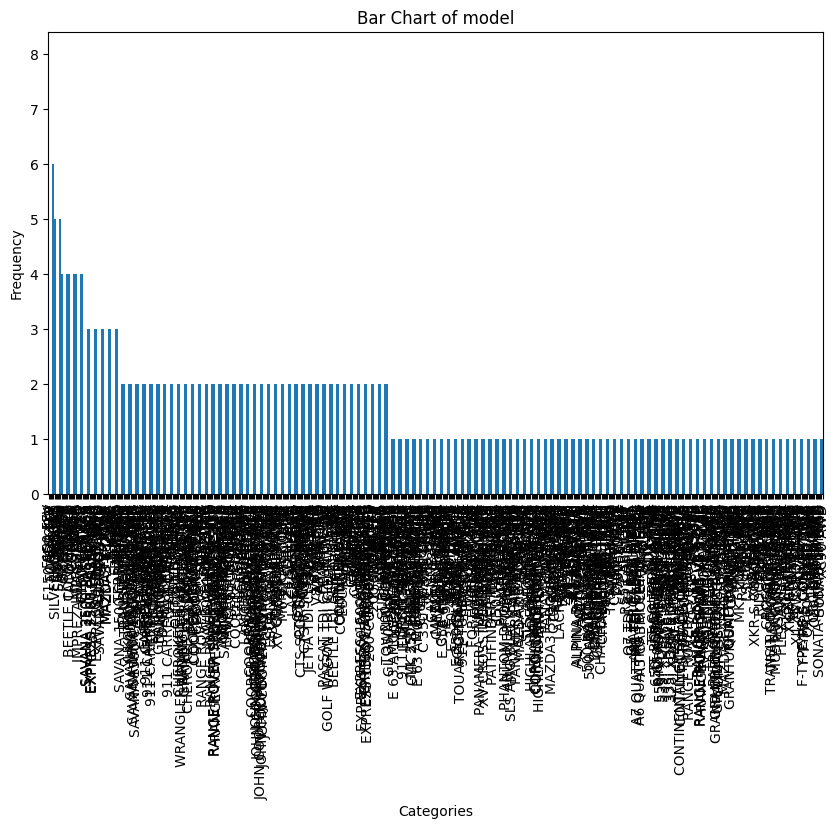

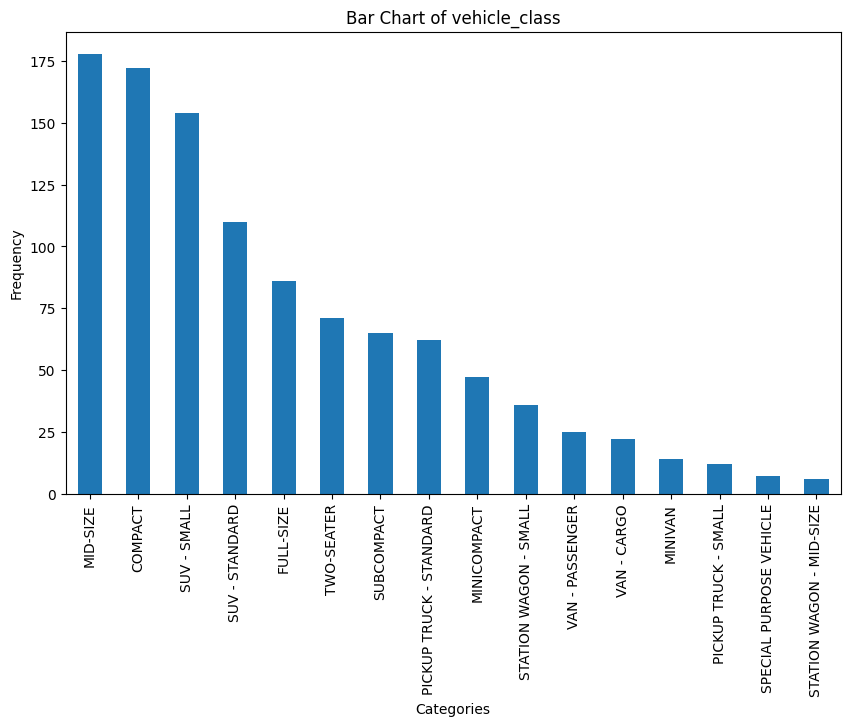

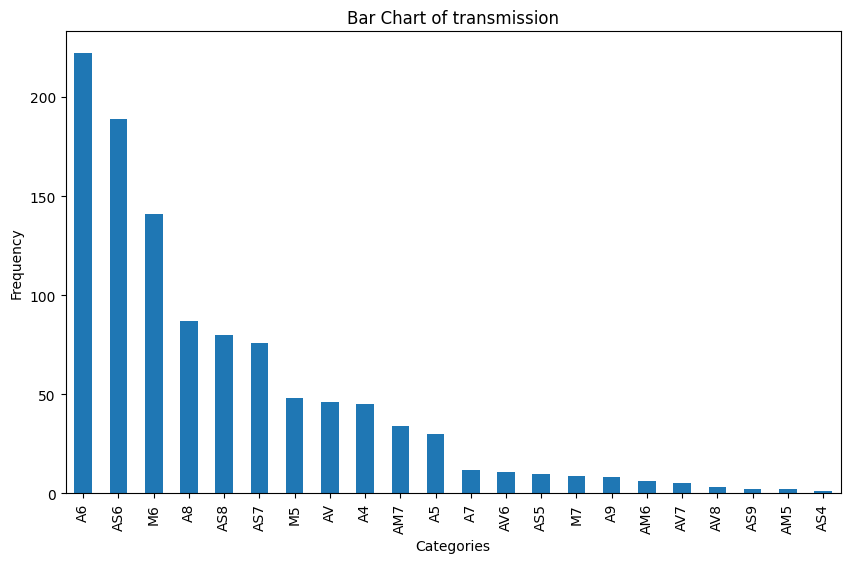

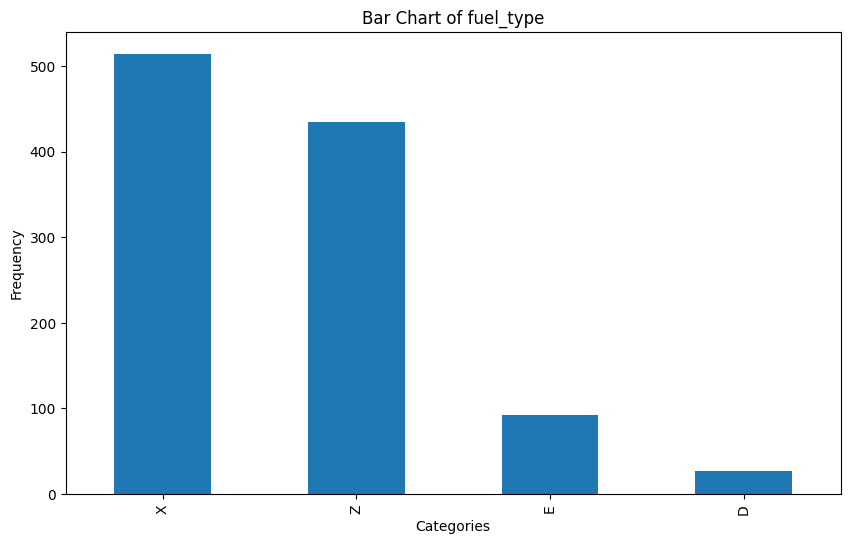

In [59]:
# Iterate over each column and create bar plots
for column in fuel_cat.columns:
    # Count the frequency of each category
    category_counts = fuel_cat[column].value_counts()

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    category_counts.plot(kind='bar')
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.title(f'Bar Chart of {column}')
    plt.show()


# Exploratory Data Analysis
### Investigating Relationships

Correlation Matrix
A correlation matrix to show the correlation coefficients between the variables

In [ ]:
corr_matrix = fuel_clean.corr()
corr_matrix

In [88]:
corr_matrix_num = fuel_num.corr()
corr_matrix_num

,model_year,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,fuel_consumption_comb_mpg,co2_emissions
model_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engine_size,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
cylinders,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
fuel_consumption_city,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
fuel_consumption_hwy,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
fuel_consumption_comb,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
fuel_consumption_comb_mpg,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
co2_emissions,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


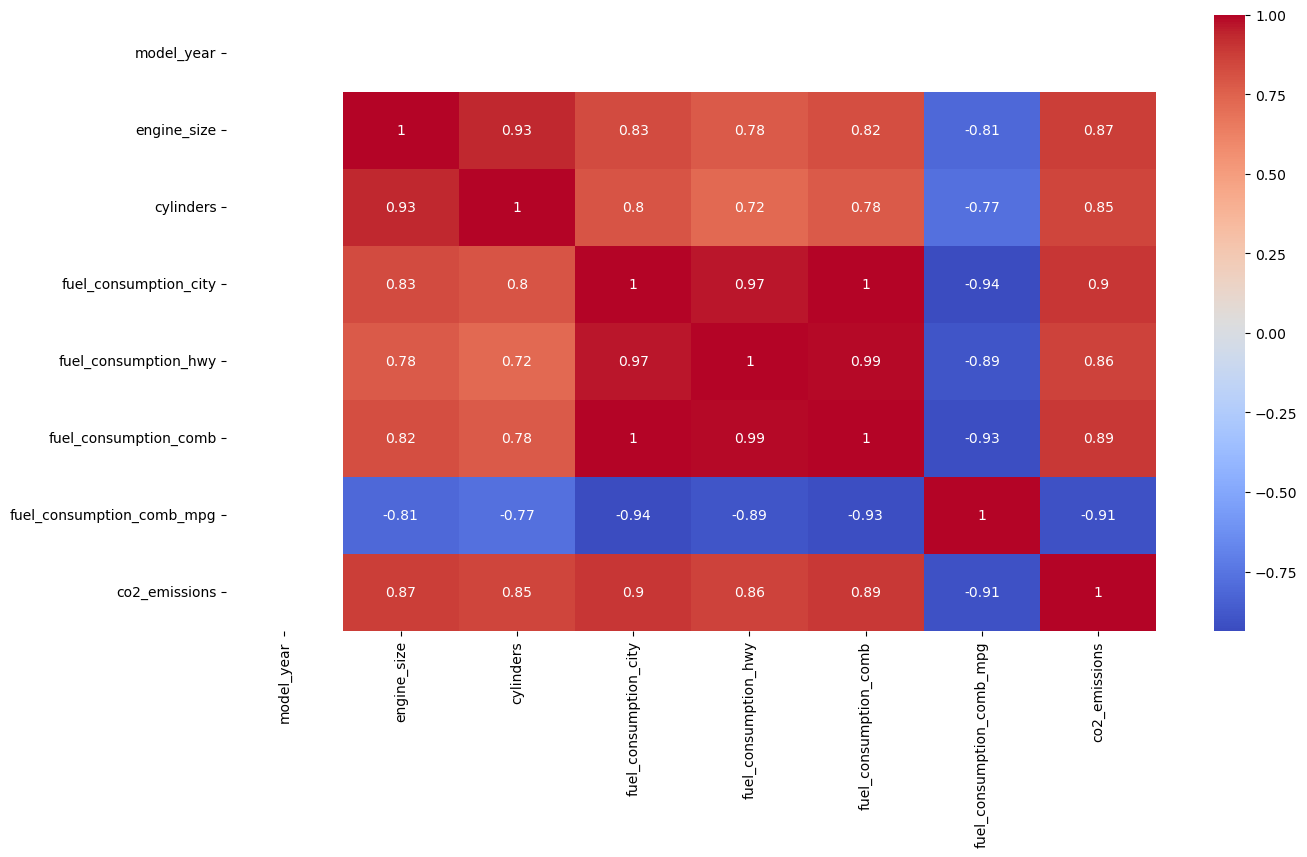

In [91]:
#Generate a heat map
# Set the plot size
plt.figure(figsize=(15, 8))

# Generate the heatmap
sns.heatmap(corr_matrix_num, annot=True, cmap="coolwarm")

# Display the plot
plt.show()

### Exploring a relationship between two numeric variables

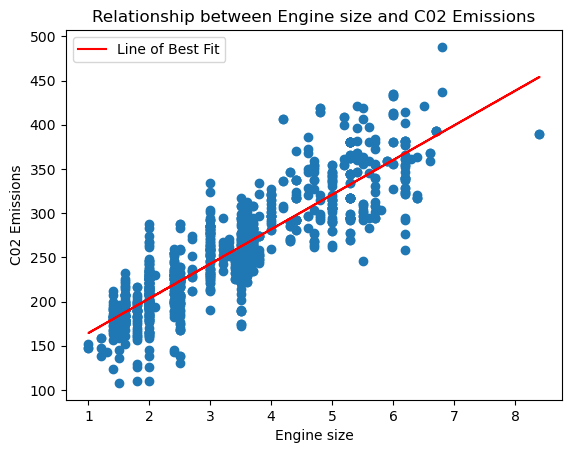

In [94]:
# Segmneting the two variables
x = fuel_num['engine_size']
y = fuel_num['co2_emissions']

# Calculate the line of best fit
slope, intercept = np.polyfit(x, y, 1)
line_of_best_fit = slope * x + intercept

# Creating a scatter plot
plt.scatter(x, y)
plt.plot(x, line_of_best_fit, color='red', label='Line of Best Fit')

# Set the labels and title
plt.xlabel('Engine size')
plt.ylabel('C02 Emissions')
plt.title('Relationship between Engine size and C02 Emissions')
plt.legend()

# Display the scatter plot with the line of best fit
plt.show()

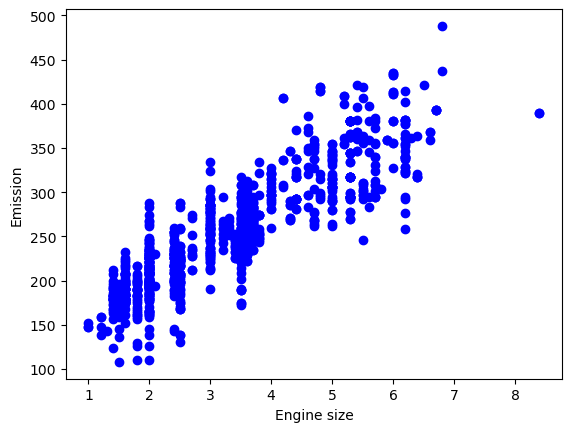

In [93]:
#plot Emission values with respect to Engine size:
plt.scatter(fuel.engine_size, fuel.co2_emissions,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

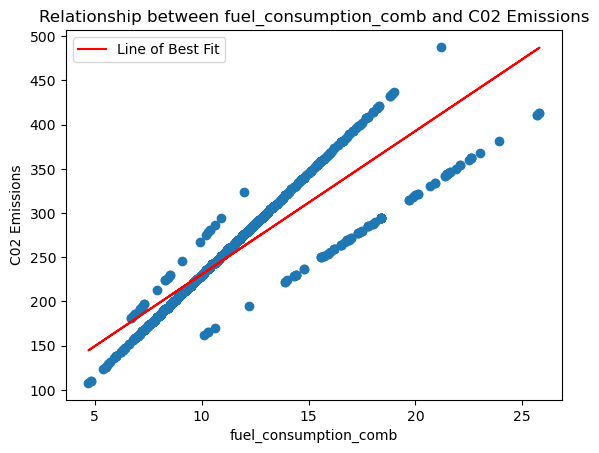

In [95]:
# Segmneting the two variables
x = fuel_num['fuel_consumption_comb']
y = fuel_num['co2_emissions']

# Calculate the line of best fit
slope, intercept = np.polyfit(x, y, 1)
line_of_best_fit = slope * x + intercept

# Creating a scatter plot
plt.scatter(x, y)
plt.plot(x, line_of_best_fit, color='red', label='Line of Best Fit')

# Set the labels and title
plt.xlabel('fuel_consumption_comb')
plt.ylabel('C02 Emissions')
plt.title('Relationship between fuel_consumption_comb and C02 Emissions')
plt.legend()

# Display the scatter plot with the line of best fit
plt.show()

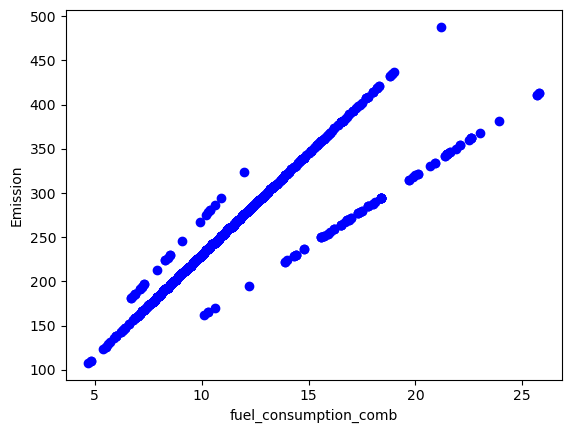

In [96]:
# Segmneting the two variables
x = fuel_num['fuel_consumption_comb']
y = fuel_num['co2_emissions']

# Calculate the line of best fit
slope, intercept = np.polyfit(x, y, 1)
line_of_best_fit = slope * x + intercept

# Creating a scatter plot
plt.scatter(x, y)
plt.plot(x, line_of_best_fit, color='red', label='Line of Best Fit')

# Set the labels and title
plt.xlabel('fuel_consumption_comb')
plt.ylabel('C02 Emissions')
plt.title('Relationship between fuel_consumption_comb and C02 Emissions')
plt.legend()

# Display the scatter plot with the line of best fit
plt.show()

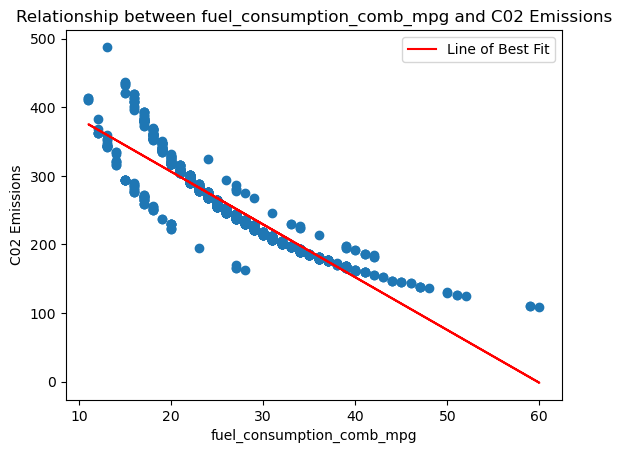

In [98]:
# Segmneting the two variables
x = fuel_num['fuel_consumption_comb_mpg']
y = fuel_num['co2_emissions']

# Calculate the line of best fit
slope, intercept = np.polyfit(x, y, 1)
line_of_best_fit = slope * x + intercept

# Creating a scatter plot
plt.scatter(x, y)
plt.plot(x, line_of_best_fit, color='red', label='Line of Best Fit')

# Set the labels and title
plt.xlabel('fuel_consumption_comb_mpg')
plt.ylabel('C02 Emissions')
plt.title('Relationship between fuel_consumption_comb_mpg and C02 Emissions')
plt.legend()

# Display the scatter plot with the line of best fit
plt.show()

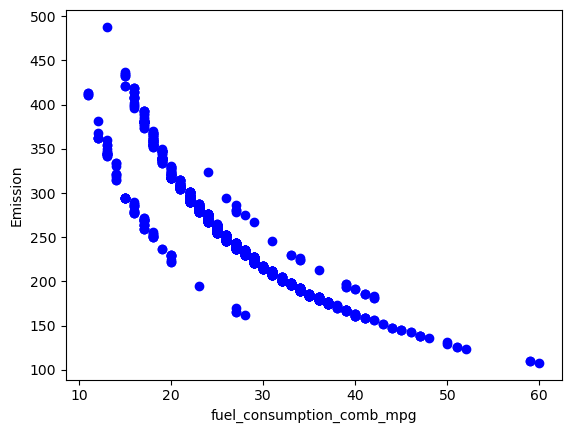

In [97]:
#plot Emission values with respect to fuel_consumption_comb_mpg:
plt.scatter(fuel.fuel_consumption_comb_mpg, fuel.co2_emissions,  color='blue')
plt.xlabel("fuel_consumption_comb_mpg")
plt.ylabel("Emission")
plt.show()

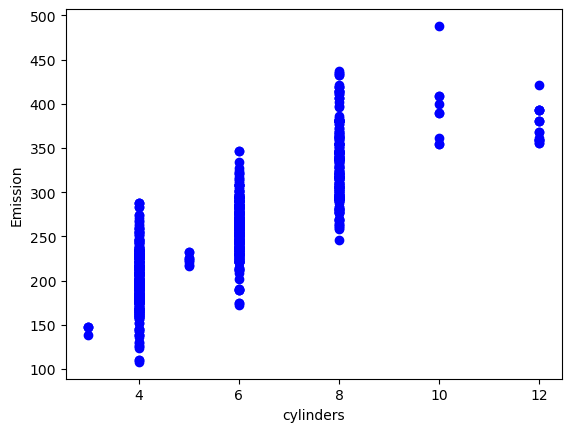

In [104]:
#plot Emission values with respect to fuel_consumption_comb_mpg:
plt.scatter(fuel.cylinders, fuel.co2_emissions,  color='blue')
plt.xlabel("cylinders")
plt.ylabel("Emission")
plt.show()

There is no variation or diversity in the x-values (cylinders) for the corresponding y-values (CO2 emissions). 
This suggests that the number of cylinders remains constant, resulting in a constant CO2 emission value.

### Observation:
There is a positive relationship between all numeric values, other than fuel_consumption_comb_mpg

In [ ]:
## Investigating the strength of the relationship
##### A further statistical test [Pearson's correlation] to understand the magnitude of the correlation above.

In [99]:
# Importing the required package
from scipy.stats import pearsonr

# Extract the two variables of interest from your dataset
x = fuel_num['engine_size']
y = fuel_num['co2_emissions']

# Calculate the Pearson correlation coefficient and p-value
correlation, p_value = pearsonr(x,y)

# Print the correlation coefficient and p-value
print("Pearson correlation coefficient:", correlation)
print("p-value:", p_value)


Pearson correlation coefficient: 0.8741543683958124
p-value: 0.0


### Observation:
    A high linear association between the engine size and Co2 emisisons. 
    The Pearson correlation coefficient of 0.874 shows a STRONG positive relationship. 
    Co2 emissions tends to increase with the size of the engine.
    With a p-value of p-value: 0.0 obtained, which is much lower than the conventional significance level of 0.05. 
    There is a statistically significant correlation between plants harvested and the total tube weight.

In [100]:
# Importing the required package
from scipy.stats import pearsonr

# Extract the two variables of interest from your dataset
x = fuel_num['fuel_consumption_city']
y = fuel_num['co2_emissions']

# Calculate the Pearson correlation coefficient and p-value
correlation, p_value = pearsonr(x,y)

# Print the correlation coefficient and p-value
print("Pearson correlation coefficient:", correlation)
print("p-value:", p_value)


Pearson correlation coefficient: 0.8980385119353925
p-value: 0.0


In [101]:
# Importing the required package
from scipy.stats import pearsonr

# Extract the two variables of interest from your dataset
x = fuel_num['fuel_consumption_comb']
y = fuel_num['co2_emissions']

# Calculate the Pearson correlation coefficient and p-value
correlation, p_value = pearsonr(x,y)

# Print the correlation coefficient and p-value
print("Pearson correlation coefficient:", correlation)
print("p-value:", p_value)


Pearson correlation coefficient: 0.8921285933157568
p-value: 0.0


In [102]:
# Importing the required package
from scipy.stats import pearsonr

# Extract the two variables of interest from your dataset
x = fuel_num['fuel_consumption_comb_mpg']
y = fuel_num['co2_emissions']

# Calculate the Pearson correlation coefficient and p-value
correlation, p_value = pearsonr(x,y)

# Print the correlation coefficient and p-value
print("Pearson correlation coefficient:", correlation)
print("p-value:", p_value)

Pearson correlation coefficient: -0.9063942295226133
p-value: 0.0


In [103]:
# Importing the required package
from scipy.stats import pearsonr

# Extract the two variables of interest from your dataset
x = fuel_num['cylinders']
y = fuel_num['co2_emissions']

# Calculate the Pearson correlation coefficient and p-value
correlation, p_value = pearsonr(x,y)

# Print the correlation coefficient and p-value
print("Pearson correlation coefficient:", correlation)
print("p-value:", p_value)

Pearson correlation coefficient: 0.8496845920141143
p-value: 2.7709372039877197e-298


In [ ]:
#'engine_size','cylinders', 'fuel_consumption_city', 'fuel_consumption_hwy', 'fuel_consumption_comb', 'co2_emissions'

### Exploring a relationship between two categorical variables
### Exploring a relationship between one categorical and one numberic variable

# Predictive Analysis

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Extract the features (X) and the target variable (y)
X = fuel[['engine_size', 'cylinders']]
y = fuel['co2_emissions']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
score = model.score(X_test, y_test)
print("R-squared score:", score)
#R-squared value assesses the goodness-of-fit of your predictive model.

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Print the predicted values and the actual values side by side
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#print(predictions)

R-squared score: 0.7748904347438592
Mean Squared Error: 930.8157832828086


In [110]:
predictions

,Actual,Predicted
732,304,314.460306
657,221,262.966617
168,294,265.861011
86,221,248.494646
411,207,202.789745
...,...,...
963,212,202.789745
294,230,214.367322
275,232,214.367322
903,260,248.494646


In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Extract the features (X) and the target variable (y)
X = fuel[['engine_size', 'fuel_consumption_comb']]
y = fuel['co2_emissions']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
score = model.score(X_test, y_test)
print("R-squared score:", score)
#R-squared value assesses the goodness-of-fit of your predictive model.

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Print the predicted values and the actual values side by side
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#print(predictions)

R-squared score: 0.8685405139405122
Mean Squared Error: 543.5778099752674


In [112]:
predictions

,Actual,Predicted
732,304,298.654815
657,221,240.517041
168,294,273.255329
86,221,230.720627
411,207,205.356736
...,...,...
963,212,207.280424
294,230,222.812306
275,232,223.774150
903,260,247.071974


In [ ]:
#'engine_size','cylinders', 'fuel_consumption_city', 'fuel_consumption_hwy', 'fuel_consumption_comb', 'co2_emissions'

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Extract the features (X) and the target variable (y)
X = fuel[['engine_size', 'fuel_consumption_city']]
y = fuel['co2_emissions']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
score = model.score(X_test, y_test)
print("R-squared score:", score)
#R-squared value assesses the goodness-of-fit of your predictive model.

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Print the predicted values and the actual values side by side
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#print(predictions)

R-squared score: 0.8714766559984765
Mean Squared Error: 531.4370225928928


In [115]:
predictions

,Actual,Predicted
732,304,299.491512
657,221,242.467966
168,294,276.551183
86,221,234.045221
411,207,207.870271
...,...,...
963,212,205.325873
294,230,228.008963
275,232,225.464565
903,260,251.007874


In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Extract the features (X) and the target variable (y)
X = fuel[['fuel_consumption_hwy', 'engine_size']]
y = fuel['co2_emissions']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
score = model.score(X_test, y_test)
print("R-squared score:", score)
#R-squared value assesses the goodness-of-fit of your predictive model.

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Print the predicted values and the actual values side by side
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#print(predictions)

R-squared score: 0.8527031036959104
Mean Squared Error: 609.0646381570302


# Applicability

Linear Regression is a mathematical relationship between an independent and dependent variable. The relationship is a direct proportion, relation making it the most simple relationship between the variables.
Y = mX+c
Y – Dependent Variable
X – Independent Variable
m and c are constants

In a multi-linear regression context, it could also be;
y = Ax1 +Bx2 + ... + c
Assumptions of Linear Regression :

1. The relationship between Y and X must be Linear.
2. The features must be independent of each other.
3. Homoscedasticity – The variation between the output must be constant for different input data.
4. The distribution of Y along X should be the Normal Distribution.

Linear Regression is a statistical technique of measuring the linear relationship between the two variables. 
By linear relationship, we mean that an increase in a variable would lead to increase in the other variable and a decrease in one variable would lead to attenuation in the second variable as well. Based on this linear relationship, we establish a model that predicts the future outcomes based on an increase in one variable.


In [120]:
#Creating train and test dataset
msk = np.random.rand(len(fuel_num)) < 0.8
train = fuel_num[msk]
test = fuel_num[~msk]

Coefficients:  [[19.97870536  5.67457017  2.74066587]]
Intercept:  [81.45478932]


Text(0, 0.5, 'Emission')

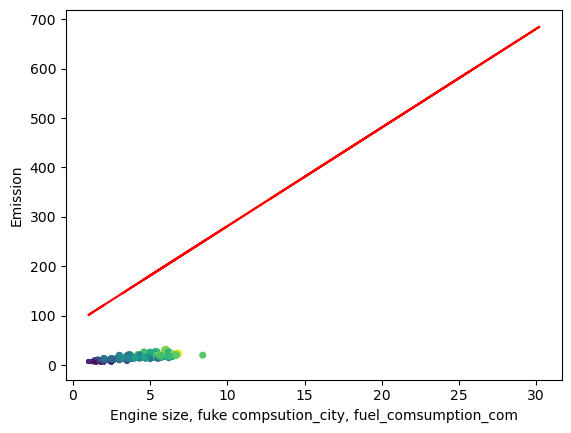

In [121]:
        #Multiple Regression Model
        from sklearn import linear_model
        regr = linear_model.LinearRegression()
        x = np.asanyarray(train[['engine_size','fuel_consumption_city','fuel_consumption_comb']])
        y = np.asanyarray(train[['co2_emissions']])
        regr.fit (x, y)
        # The coefficients
        print ('Coefficients: ', regr.coef_)
        print ('Intercept: ', regr.intercept_)


        regr.fit (x, y)
        plt.scatter(train.engine_size, train.fuel_consumption_city, train.fuel_consumption_comb, train.co2_emissions)
        plt.plot(x, regr.coef_[0][0]*x + regr.intercept_[0], '-r')
        plt.xlabel("Engine size, fuel compsution_city, fuel_comsumption_com")
        plt.ylabel("Emission")

Coefficients: The coefficients represent the estimated slopes or weights assigned to each independent variable in the multiple linear regression equation. 
Toefficients are an array: [[19.97870536, 5.67457017, 2.74066587]]. 
Each coefficient corresponds to one of the independent variables: engine_size, fuel_consumption_city, and fuel_consumption_comb, respectively. 
These coefficients indicate the change in the dependent variable (CO2 emissions) associated with a one-unit change in each respective independent variable, holding the other variables constant. 
For example, for every one-unit increase in engine_size, the model predicts an average increase of 19.98 units in CO2 emissions, while keeping the other variables constant.

Intercept: The intercept term represents the estimated value of the dependent variable (CO2 emissions) when all independent variables are set to zero. 
The intercept value is [81.45478932]. It indicates the baseline level of CO2 emissions when the engine size, fuel consumption in the city, and fuel consumption in the combined cycle are all zero. 

We can use the coefficients and intercept to build the multiple linear regression equation and make predictions. 

The equation would be:

#### CO2 emissions = (19.97870536 * engine_size) + (5.67457017 * fuel_consumption_city) + (2.74066587 * fuel_consumption_comb) + 81.45478932

##### All you need to do for the car manufacturing is to specify the values of the independent values, and the car manufacturing company will be able to estimate the Co2 emissions.


In [141]:
#Prediction and Evaluation

y_hat= regr.predict(test[['engine_size','fuel_consumption_city','fuel_consumption_comb']])
x = np.asanyarray(test[['engine_size','fuel_consumption_city','fuel_consumption_comb']])
y = np.asanyarray(test[['co2_emissions']])


# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y, y_hat)
print('Mean Absolute Error (MAE):', mae)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y, y_hat)
print('Mean Squared Error (MSE):', mse)

# Calculate R-squared score (R2-score)
r2 = r2_score(y, y_hat)
print('R-squared score:', r2)


Mean Absolute Error (MAE): 16.374968793034064
Mean Squared Error (MSE): 496.28426784071917
R-squared score: 0.8712298026702968


A lower MSE and a higher variance score indicate better predictive accuracy and a better fit of the model to the test data, respectively.

In [137]:
# Convert the predicted values (y_hat) to a DataFrame
predicted_df = pd.DataFrame(y_hat, columns=['Predicted CO2 Emissions'])

# Reset the index of the test DataFrame
test = test.reset_index(drop=True)

# Combine the actual and predicted DataFrames
result_df = pd.concat([test.co2_emissions, predicted_df], axis=1)

# Print the combined DataFrame
result_df

,co2_emissions,Predicted CO2 Emissions
0,221,219.269260
1,255,258.431888
2,354,320.270679
3,359,344.225801
4,230,214.076416
...,...,...
220,214,205.348465
221,216,207.324903
222,278,267.119082
223,258,249.851516


In [138]:
length_actual = len(test)
length_predicted = len(predicted_df)

print("Length of actual values:", length_actual)
print("Length of predicted values:", length_predicted)


Length of actual values: 225
Length of predicted values: 225


R-squared score
The R-squared score measures the proportion of the variance in the dependent variable (predicted values) that can be explained by the independent variables (input features). A score of 1.0 indicates that the model can perfectly explain the variance in the target variable. In other words, the model fits the data perfectly.

An R-squared score of -1.25 indicates that the model performs poorly in explaining the variance in the target variable. A negative R-squared value suggests that the model is worse than simply using the mean of the target variable to make predictions.
It is important to note that R-squared values should typically be between 0 and 1, with higher values indicating a better fit. A negative value suggests that the model does not fit the data well.

Mean Squared Error (MSE)
MSE measures the average squared difference between the predicted values and the actual values. A very low MSE value suggests that the model's predictions are very close to the actual values, almost zero in this case. This indicates that the model performs extremely well in terms of minimizing the squared errors.

The MSE value of 496.28 is quite low.

Mean Absolute Error (MAE)
MAE measures the average absolute difference between the predicted values and the actual values. A very low MAE value suggests that the model's predictions are very close to the actual values, almost zero in this case. This indicates that the model performs extremely well in terms of minimizing the absolute errors.
The MAE value of 16.37. MAE is less sensitive to outliers compared to MSE.


R-squared score: The R-squared score of 0.871 indicates the proportion of the variance in the CO2 emissions that can be explained by the independent variables (engine size, fuel consumption city, and fuel consumption comb) used in the multiple regression model. This value ranges between 0 and 1, with 1 indicating a perfect fit.
An R-squared score of 0.871 suggests that approximately 87.1% of the variance in the CO2 emissions can be explained by the independent variables included in your model. This indicates a reasonably good fit of the model to the data.

Overall, these metrics suggest that your multiple regression model is performing reasonably well in predicting CO2 emissions based on the given independent variables

In [142]:
fuel

,model_year,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,fuel_consumption_comb_mpg,co2_emissions
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [144]:
# Specify the make you want to filter
our_make = 'VOLVO'

# Filter the dataframe based on the specified make
fuel_volvo = fuel[fuel['make'] == our_make]


In [145]:
fuel_volvo

,model_year,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,fuel_consumption_comb_mpg,co2_emissions
1056,2014,VOLVO,S60,COMPACT,2.5,5,AS6,X,11.3,7.8,9.7,29,223
1057,2014,VOLVO,S60 AWD,COMPACT,2.5,5,AS6,X,11.6,8.3,10.1,28,232
1058,2014,VOLVO,S60 AWD,COMPACT,3.0,6,AS6,X,13.2,9.5,11.5,25,264
1059,2014,VOLVO,S80,MID-SIZE,3.2,6,AS6,X,11.9,8.1,10.2,28,235
1060,2014,VOLVO,S80 AWD,MID-SIZE,3.0,6,AS6,X,13.2,9.5,11.5,25,264
1061,2014,VOLVO,XC60,SUV - SMALL,3.2,6,AS6,X,13.0,8.9,11.2,25,258
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


###OR
#Filter the dataframe based on the specified make
fuel_volvo = fuel[fuel['make'] == 'VOLVO']
fuel_volvo